## Topic 3. 1D Linear, Single Equation - (1D model eqs - most simplified cases)

1. convection equation
2. diffusion equation
3. Bergers equation

### 1. 1-D linear convection model and initial conditions

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

With proper initial conditions, the equation shows the propagation of the initial status with speed $c$ (speed of sound), without any change to the shape of the initial figure. We will let the initial condition be $u(x,0)=u_0(x)$. The exact solution of the equation will then be $u(x,t)=u_0(x-ct)$.

### Discretizing the equation

To solve the equation numerically, we need to first have this equation be discretized (in both time and space). 

Utilizing the first order forward difference scheme to discretize time: 

$$\frac{\partial u}{\partial t}\approx \frac{u_i^{n+1}-u_i^n}{\Delta t}$$

The superscripts will denote the time steps and the subscripts will denote the points along the grid space. Likewise, the space derivative is discretized using a 2nd order central difference scheme:

$$\frac{\partial u}{\partial x}\approx \frac{u_{i+1}^n - u_{i-1}^n}{2 \Delta x}$$

The discrete equation will therefore be:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_{i+1}^n - u_{i-1}^n}{2 \Delta x} = 0 $$

Because we know the initial conditions, for the first time step, the only unknown in this discretization is $u_i^{n+1}$. We can solve for this unknown to get an equation that allows us to advance in time:

$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{2 \Delta x}(u_{i+1}^n-u_{i-1}^n)$$

### Create the computational domain and solve the problem using a code

The spatial domain will be [0,1]. The variable `nx` is the number of grid points across the 1D domain. The variable `dx` will be the step size between any pair of adjacent grid points.

For the time, We will set the time step $\Delta t = 0.001$, and calculate 300 timesteps for a total time $t = 0.001*300 = 0.3$ .
The initial velocity $u_0$ is given as $u = 2$ in the interval $[2dx, 4dx]$  and $u = 0.5$ everywhere else (creating a hat function).

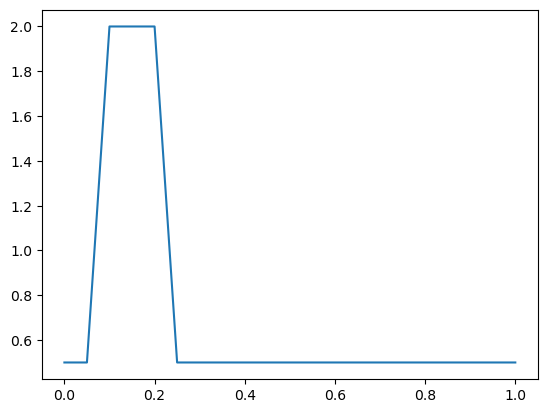

In [1]:
#plotting the original setup
import numpy as np           
import matplotlib.pyplot as plt

%matplotlib inline
nx = 21   #number of grid points in the 1d domain
dx = 1.0 / (nx-1)  # delta x for each subinterval
nt = 300   # total time steps, total time is nt*dt
dt = 0.001  
c = 1      
x=np.linspace(0,1,nx)
u=np.empty((nt,nx),dtype= np.float64)
u[:,0]=0.5  # boundary condition at x=0 (why the bc at x=1 is not needed?)
u[0,:]=0.5
u[0,2:5]=2.0   #init condition
plt.plot(x, u[0,:]) # plot the initial condition

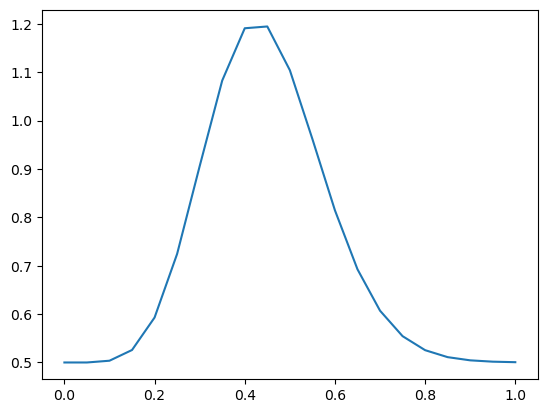

In [2]:
#plotting the solution after time t
for n in range(1,nt):  # time steps n=1 to nt-1
    for i in range(1, nx): 
        u[n,i] = u[n-1,i] - c * dt / dx * (u[n-1,i] - u[n-1,i-1])
plt.plot(x,u[n-1,:]) # plot the solution at t=nt*dt

### Results at all the time steps:

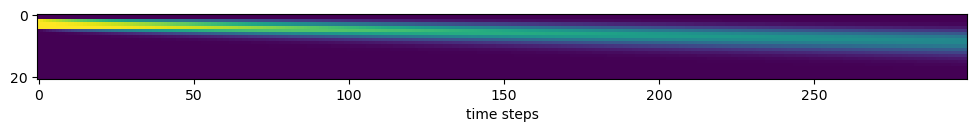

In [3]:
plt.figure(figsize=(12,6))
plt.xlabel("time steps")
plt.imshow(u.transpose())

## Discussion of the results: 
The hat shape becomes irregular due to errors from dissipation. As time goes by, the intensity decreases causing the distribution of larger values to become wider.

## Improving the simulation
### (1) Changes to $dx$
We will now make $dx$ smaller to improve the results of the simulation.

We will need to solve the 1D convection equation numerous times under many different situations, so it is best to create a function to calculate at any desired inputs.

In [4]:
#creating the function convection_eq_1st to calculate 1D convection
import numpy as np           
import matplotlib.pyplot as plt

%matplotlib inline

def convection_eq_1st(total_distance,total_time, c,dx,dt):
    nx = int(total_distance/dx)+1   #number of grid points in the 1d domain
    nt = int(total_time/dt)   # total time steps, total time is nt*dt
    x=np.linspace(0,1,nx)
    u=np.empty((nt,nx),dtype= np.float64)
    u[:,0]=0.5  # boundary condition at x=0 (why the bc at x=1 is not needed?)
    u[0,:]=0.5
    for i in range(nx):
        if x[i]>=0.1 and x[i]<=0.25 : u[0,i]=2.0

    for n in range(1,nt):  # time steps n=1 to nt-1
        for i in range(1, nx): 
            u[n,i] = u[n-1,i] - c * dt / dx * (u[n-1,i] - u[n-1,i-1])

    plt.subplot(3,1,1)
    plt.plot(x, u[0,:]) # plot the initial condition
    plt.subplot(3,1,2)
    plt.plot(x,u[n-1,:]) # plot the solution at t=nt*dt
    plt.subplot(3,1,3)
    plt.imshow(u.transpose())
    plt.tight_layout()


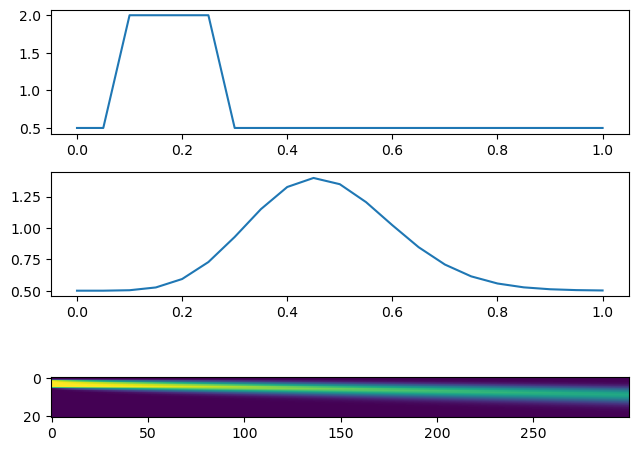

In [5]:
#initial run of the function
'''c=1.0
total_distance=1.0
total_time=0.3
'''
convection_eq_1st(1.0,0.3, 1.0, 0.05,0.001)

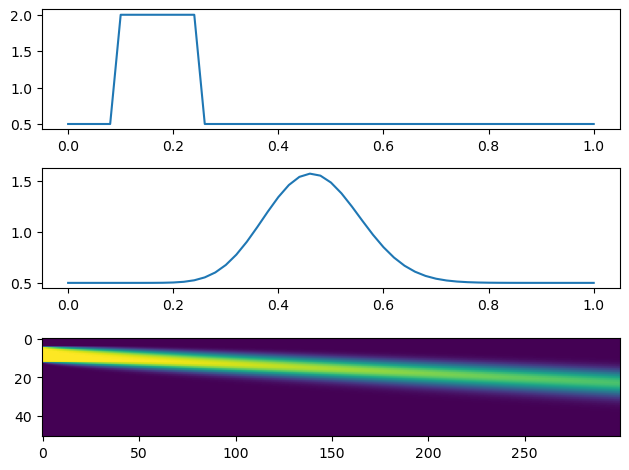

In [6]:
#decreasing dx
convection_eq_1st(1.0,0.3,1.0, 0.02,0.001)

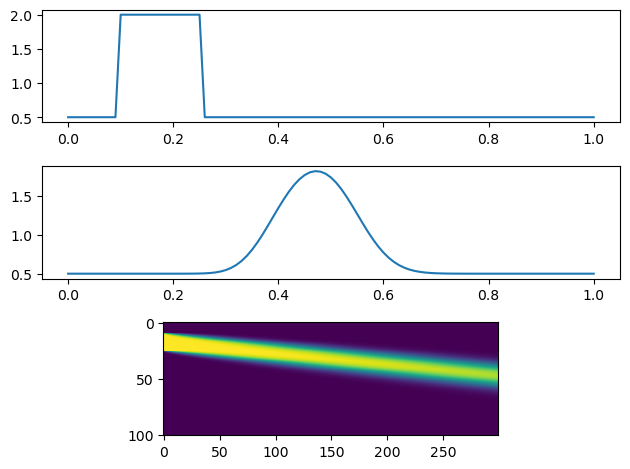

In [7]:
#further decreasing dx
convection_eq_1st(1.0,0.3,1.0,0.01,0.001)

One can see that as the value of $dx$ decreases, the initial hat function becomes a smoother parabolic shape as time increases.

## Improving the simulation
### (2) 2nd Order Central Difference Scheme
The second order central difference scheme is preferred for the discretization of $\frac{\partial}{\partial x}$ because it is more stable than the 1st order forward or backward difference scheme. For $\frac{\partial}{\partial t}$, the first order forward difference scheme is used exclusively because we don't have values at previous time steps BEFORE the time the simulation begins. We can only move forward in time not backward.

In [8]:
#creating a function to calculate convection using 2nd order central difference scheme for d/dx
import numpy as np           
import matplotlib.pyplot as plt

def convection_eq_2nd(total_distance,total_time, c, dx,dt):
    nx = int(total_distance/dx)+1   #number of grid points in the 1d domain
    nt = int(total_time/dt)   # total time steps, total time is nt*dt
    x=np.linspace(0,1,nx)
    u=np.empty((nt,nx),dtype= np.float64)
    u[:,0]=0.5  # boundary condition at x=0 (why the bc at x=1 is not needed?)
    u[0,:]=0.5
    for i in range(nx):
        if x[i]>=0.1 and x[i]<=0.25 : u[0,i]=2.0

    for n in range(1,nt):  # time steps n=1 to nt-1
        for i in range(1, nx-1): 
            u[n,i] = u[n-1,i] - c * dt / dx/2.0 * (u[n-1,i+1] - u[n-1,i-1])
        u[n,nx-1] = u[n-1,nx-1] - c * dt / dx * (u[n-1,nx-1] - u[n-1,nx-2])
    plt.subplot(3,1,1)
    plt.plot(x, u[0,:]) # plot the initial condition
    plt.subplot(3,1,2)
    plt.plot(x,u[n-1,:]) # plot the solution at t=nt*dt
    plt.subplot(3,1,3)
    plt.imshow(u.transpose())
    plt.tight_layout()


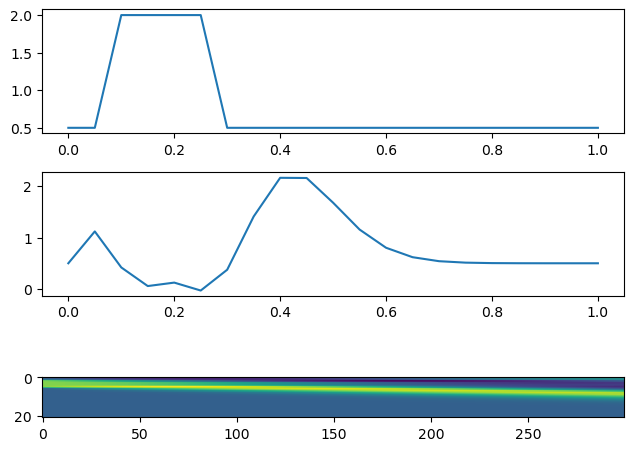

In [9]:
%matplotlib inline

convection_eq_2nd(1.0,0.3,1.0,0.05,0.001) # c=1.0,total_distance=1.0, total_time=0.3

What happend??

## More on 1D equations


### 2. The 1D diffusion equation:

$$\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}$$


Review - numerical differentiation for second derivatives


$$\frac{\partial ^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + O(\Delta x^2)$$


Discretized 1D diffusion equation:


$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}$$

Solve for $ u_{i}^{n+1} $

$$u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})$$

Both initial condition and boundary condtion are need for solving the difference equation. <br>

Let $t=0$, $u=2$ in the interval $0.4d\le x\le 0.6d$ and $u=0.5$ everywhere else in the domain $[0,d]$, d is the length of the domain.

In [11]:
#creating a function to solve the 1D diffusion equation
import numpy as np           
import matplotlib.pyplot as plt

%matplotlib inline

total_distance=10
total_time=0.5

def diffusion_eq(dx,dt):
    nx = int(total_distance/dx)+1   #number of grid points in the 1d domain
    nt = int(total_time/dt)   # total time steps, total time is nt*dt
    x=np.linspace(0,total_distance,nx)
    u=np.empty((nt,nx),dtype= np.float64)
    u[0,:]=0.5
    for i in range(nx):
        if x[i]>=0.4*total_distance and x[i]<=0.6*total_distance : u[0,i]=2.0

    for n in range(1,nt):  # time steps n=1 to nt-1
        for i in range(1, nx-1): 
            u[n,i] = u[n-1,i] + (u[n-1,i+1] -2*u[n-1,i]+u[n-1,i-1])*dt/dx**2
        u[n,nx-1] = u[n,nx-2] 
        u[n,0]= u[n,1]
    plt.subplot(3,1,1)
    plt.plot(x, u[0,:]) # plot the inital condition
    plt.subplot(3,1,2)
    plt.plot(x,u[n-1,:]) # plot the solution at t=nt*dt
    plt.subplot(3,1,3)
    plt.imshow(u.transpose())
    plt.tight_layout()

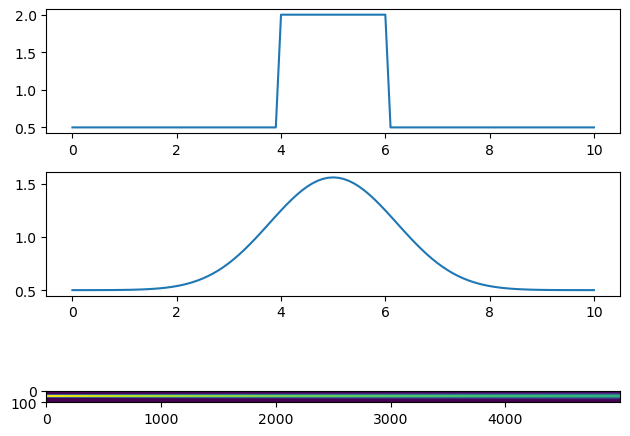

In [12]:
diffusion_eq(0.1,0.0001)

### 3. Burgers' equation

1D Burgers' equation:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial ^2u}{\partial x^2}$$

it is a combination of convection and diffusion equations. 

Using forward difference for time, backward difference for space and our 2nd-order method for the second derivatives yields:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = \nu \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}$$

once we have an initial condition, the only unknown is $u_i^{n+1}$. We will step in time as follows:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

In [13]:
#creating a function for 1D Burgers equation
import numpy as np           
import matplotlib.pyplot as plt

%matplotlib inline

def burgers_eq(total_distance,total_time, dx,dt):
    nx = int(total_distance/dx)+1   #number of grid points in the 1d domain
    nt = int(total_time/dt)   # total time steps, total time is nt*dt
    x=np.linspace(0,total_distance,nx)
    u=np.empty((nt,nx),dtype= np.float64)
    u[0,:]=0.5
    u[:,0]=0.5
    for i in range(nx):
        if x[i]>=0.4*total_distance and x[i]<=0.6*total_distance : u[0,i]=2.0

    for n in range(1,nt):  # time steps n=1 to nt-1
        for i in range(1, nx-1): 
            u[n,i] = u[n-1,i] - u[n-1,i]*(u[n-1,i]-u[n-1,i-1])*dt/dx+ (u[n-1,i+1] -2*u[n-1,i]+u[n-1,i-1])*dt/dx**2
        u[n,nx-1] = u[n,nx-2] 
 
    plt.subplot(3,1,1)
    plt.plot(x, u[0,:]) # plot the inital condition
    plt.subplot(3,1,2)
    plt.plot(x,u[n-1,:]) # plot the solution at t=nt*dt
    plt.subplot(3,1,3)
    plt.imshow(u.transpose())
    plt.tight_layout()

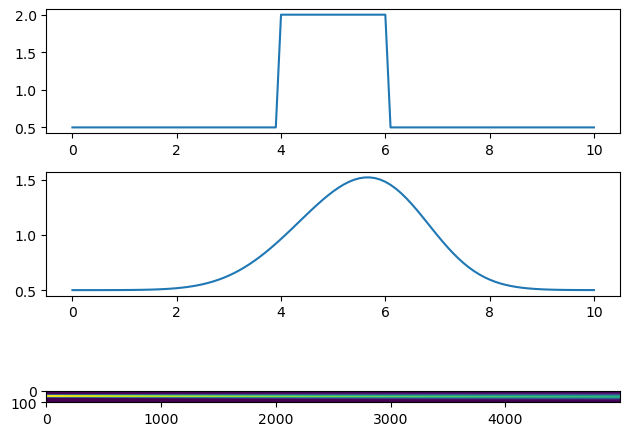

In [14]:
'''total_distance=10
total_time=0.5
'''
burgers_eq(10,0.5,0.1,0.0001)